In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow
import keras 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D, AveragePooling2D
from keras.optimizers import SGD, RMSprop
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

### The dataset is of 10 breeds of cats: Bombay, Calico, Burmese, Himalayan, Munchkin, ragdoll, Siberian, British shorthair, Russian Blue, Dilute Calico.  We will train the architecture on this dataset consisting of 10 different classes. 

In [ ]:
base='C:/Users/Shamine/Downloads/images'

bombay=os.path.join(base,'Bombay')
british_shorthair=os.path.join(base,'British Shorthair')
burmese=os.path.join(base,'Burmese')
calico=os.path.join(base,'Calico')
dilute_calico=os.path.join(base,'Dilute calico')
himalayan=os.path.join(base,'Himalayan')
munchkin=os.path.join(base,'Munchkin')
ragdoll=os.path.join(base,'Ragdoll')
russian_blue=os.path.join(base,'Russian Blue')
siberian=os.path.join(base,'Siberian')


In [ ]:
print(os.listdir(siberian))

['18528351_595.jpg', '18536346_594.jpg', '18935491_591.jpg', '19940716_572.jpg', '19954618_571.jpg', '19970595_570.jpg', '20535778_563.jpg', '20992970_556.jpg', '21804671_549.jpg', '21928900_546.jpg', '22623773_538.jpg', '23165391_531.jpg', '23180874_530.jpg', '23181119_529.jpg', '23368019_525.jpg', '24265146_518.jpg', '24435005_517.jpg', '24499820_514.jpg', '24561140_510.jpg', '24993513_506.jpg', '25066352_504.jpg', '25340053_502.jpg', '25851018_495.jpg', '26273986_487.jpg', '26555717_484.jpg', '26555752_483.jpg', '27077903_478.jpg', '27480789_472.jpg', '27758881_468.jpg', '27991360_465.jpg', '28004134_464.jpg', '28033995_463.jpg', '28050949_462.jpg', '28050972_461.jpg', '28051004_460.jpg', '28345595_455.jpg', '28588557_452.jpg', '28777969_450.jpg', '28825264_449.jpg', '28869485_443.jpg', '28979694_442.jpg', '29156772_438.jpg', '29277740_436.jpg', '29294241_435.jpg', '29386759_432.jpg', '29958882_422.jpg', '30093332_420.jpg', '30481868_414.jpg', '31397808_401.jpg', '31426679_397.jpg',

In [ ]:
print(len(os.listdir(siberian)))
print(len(os.listdir(bombay)))
print(len(os.listdir(british_shorthair)))
print(len(os.listdir(burmese)))
print(len(os.listdir(calico)))
print(len(os.listdir(dilute_calico)))
print(len(os.listdir(himalayan)))
print(len(os.listdir(munchkin)))
print(len(os.listdir(ragdoll)))
print(len(os.listdir(russian_blue)))
print(len(os.listdir(siberian)))

189
1835
567
344
3468
3230
1301
181
2669
1870
189


In [ ]:
bombay_fname=os.listdir(bombay)
british_fname=os.listdir(british_shorthair)
himalayan_fname=os.listdir(himalayan)

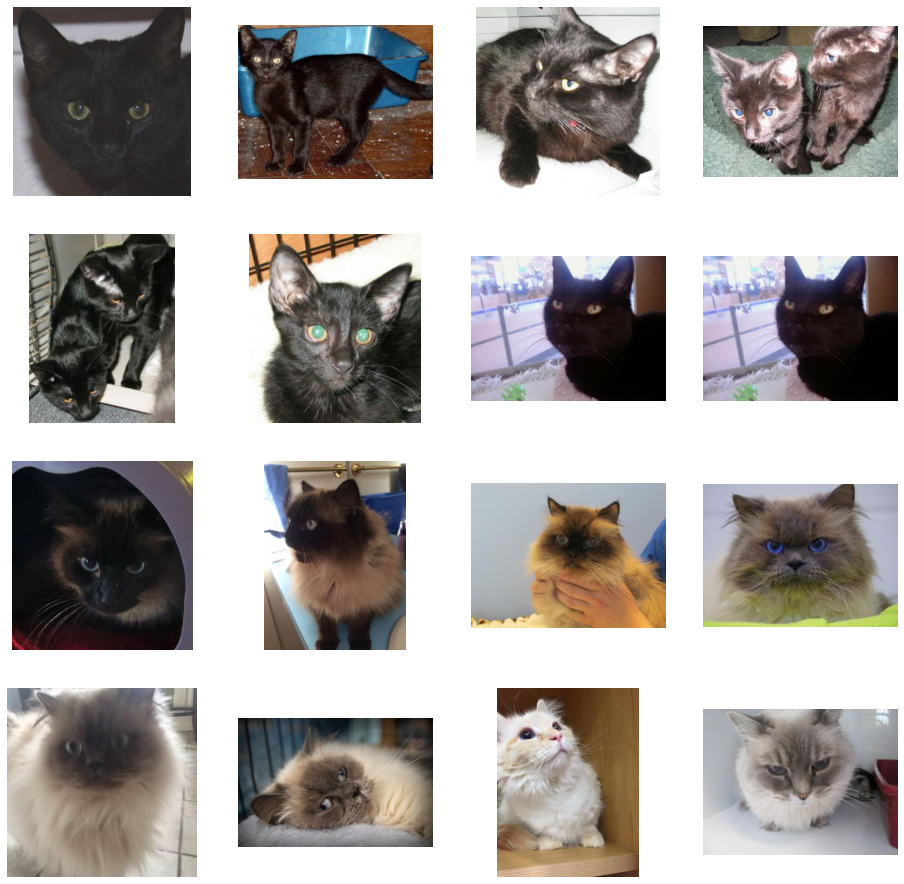

In [ ]:
nrows=4
ncols=4

pic_index=0
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index += 8
next_bombay_pix=[os.path.join(bombay,fname) for fname in bombay_fname[pic_index-8:pic_index]]
next_himalayan_pix=[os.path.join(himalayan,fname) for fname in himalayan_fname[pic_index-8:pic_index]]


for i,img_path in enumerate(next_bombay_pix+next_himalayan_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('off')
    img=mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

### In order to create a model, let us first decide an input_img tensor as 32x32 image with 3 channels (RGB). We will create 1x1, 3x3, 5x5 Convolution layers for the inception model. We will provide input_img tensor to layer_1, layer_2, layer_3. The padding is kept same so that the output shape of the Conv2D operation is same as the input shape. So, the final output of each filter of layer_1, layer_2 and layer_3 is same. Thus, we can easily concatenate these filters to form the output of our inception module. We flatten the output to a one-dimensional collection of neurons which is then used to create a fully connected neural network as a final classifier. 


In [ ]:
input_img = Input(shape=(32, 32, 3))


### 1st layer
layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_1 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_1)

layer_2 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_2 = Conv2D(10, (5,5), padding='same', activation='relu')(layer_2)

layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
layer_3 = Conv2D(10, (1,1), padding='same', activation='relu')(layer_3)

mid_1 = keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)

flat_1 = Flatten()(mid_1)

dense_1 = Dense(1000, activation='relu')(flat_1)
dense_2 = Dense(800, activation='relu')(dense_1)
output = Dense(10, activation='softmax')(dense_2)

model = Model([input_img], output)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 10)   40          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 10)   40          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 3)    0           input_1[0][0]                    
_______________________________________________________________________________________

### Each image is represented as 32x32 pixels each for red, blue and green channels. The labels are converted to categorical type using one hot encoding, dataset is split into training and testing sets. Image size is kept constant and all these tasks are carried by “image_dataset_from_library” from the TensorFlow library. 
### Thus, we obtain a fully connected neural network with final layer having 10 neurons one corresponding to each class. 

### We have 12524 file images in the training set and 3130 file images in the validation set

In [ ]:
import tensorflow as tf
train_batch_size = 64  # Set the training batch size 
valid_batch_size = 64  # Set the tetsing batch size
dir = r'C:/Users/Shamine/Downloads/images'
img_size = 32  # Set the image size


train_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir, labels='inferred', label_mode='categorical', class_names=None,
    color_mode='rgb', batch_size=train_batch_size, image_size=(img_size, img_size),
    shuffle=True, seed=12, validation_split=.2, subset="training",
    interpolation='nearest', follow_links=False)

valid_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir, labels='inferred', label_mode='categorical', class_names=None,
    color_mode='rgb', batch_size=valid_batch_size, image_size=(img_size, img_size),
    shuffle=False, seed=12, validation_split=.2, subset="validation",
    interpolation='nearest', follow_links=False)

Found 15654 files belonging to 10 classes.
Using 12524 files for training.
Found 15654 files belonging to 10 classes.
Using 3130 files for validation.


### We can now create the model we compile and fit the model with RMSprop optimizer

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#RMSprop(lr=0.001)

history = model.fit(train_set, epochs=50, validation_data= valid_set, batch_size=64,verbose=2)

model.save('inception1_model.h5')
model.save_weights('inception1_weights.h5')

Epoch 1/50
196/196 - 75s - loss: 29.3802 - accuracy: 0.1951 - val_loss: 9.2526 - val_accuracy: 0.0588
Epoch 2/50
196/196 - 82s - loss: 2.7742 - accuracy: 0.3239 - val_loss: 1.8811 - val_accuracy: 0.2936
Epoch 3/50
196/196 - 86s - loss: 1.4685 - accuracy: 0.5054 - val_loss: 1.2191 - val_accuracy: 0.6022
Epoch 4/50
196/196 - 85s - loss: 0.7968 - accuracy: 0.7404 - val_loss: 1.0633 - val_accuracy: 0.7332
Epoch 5/50
196/196 - 83s - loss: 0.3725 - accuracy: 0.8964 - val_loss: 1.2222 - val_accuracy: 0.7930
Epoch 6/50
196/196 - 84s - loss: 0.2254 - accuracy: 0.9478 - val_loss: 1.1360 - val_accuracy: 0.8105
Epoch 7/50
196/196 - 84s - loss: 0.1678 - accuracy: 0.9630 - val_loss: 1.3125 - val_accuracy: 0.8294
Epoch 8/50
196/196 - 93s - loss: 0.1122 - accuracy: 0.9744 - val_loss: 1.0722 - val_accuracy: 0.8435
Epoch 9/50
196/196 - 86s - loss: 0.1354 - accuracy: 0.9738 - val_loss: 1.5521 - val_accuracy: 0.8227
Epoch 10/50
196/196 - 88s - loss: 0.1292 - accuracy: 0.9766 - val_loss: 1.1826 - val_accur

### Loss and Accuracy graph of the Inception Architecture

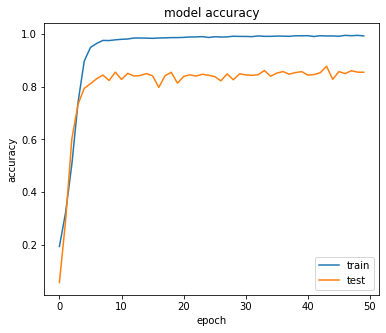

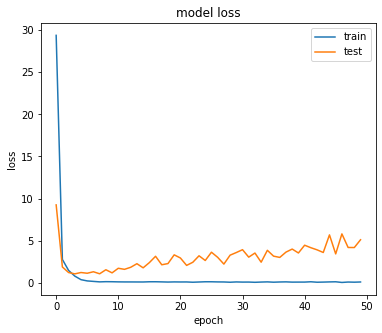

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.figure(figsize=(6,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Predictions

The below image is of Himalayan cat breed


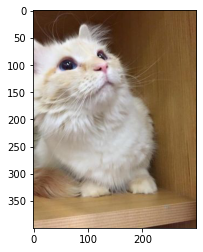

In [ ]:
path='C:/Users/Shamine/Downloads/images/31960470_3086.jpg'

imag=tf.keras.preprocessing.image.load_img(path)
plt.imshow(imag)


img=tf.keras.preprocessing.image.load_img(path,target_size=(32,32))

x=tf.keras.preprocessing.image.img_to_array(img)#converting image into array 
x=np.expand_dims(x,axis=0)#expanding image dimensions for better predictions
images=np.vstack([x])
c=model.predict(images,batch_size=10)
p=c.argmax()

# Variable p can predict value between 0-9. Therefore the below if else command will help us know the cat's breed
if(p==0):
    print("The below image is of Bombay cat breed")
elif(p==1):
    print("The below image is of British Shorthair cat breed")
elif(p==2):
    print("The below image is of Burmese cat breed")
elif(p==3):
    print("The below image is of Calico cat breed")
elif(p==4):
    print("The below image is of Dilute Calico cat breed")
elif(p==5):
    print("The below image is of Himalayan cat breed")
elif(p==6):
    print("The below image is of Munchkin cat breed")
elif(p==7):
    print("The below image is of Ragdoll cat breed")
elif(p==8):
    print("The below image is of Russian Blue cat breed")
else:
    print("The below image is of Siberian cat breed")

The below image is of Russian Blue cat breed


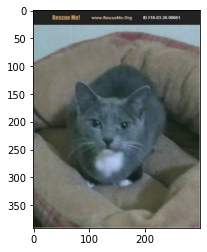

In [ ]:
path='C:/Users/Shamine/Downloads/images/41262096_7397.jpg'

imag=tf.keras.preprocessing.image.load_img(path)
plt.imshow(imag)


img=tf.keras.preprocessing.image.load_img(path,target_size=(32,32))

x=tf.keras.preprocessing.image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
c=model.predict(images,batch_size=10)
p=c.argmax()

if(p==0):
    print("The below image is of Bombay cat breed")
elif(p==1):
    print("The below image is of British Shorthair cat breed")
elif(p==2):
    print("The below image is of Burmese cat breed")
elif(p==3):
    print("The below image is of Calico cat breed")
elif(p==4):
    print("The below image is of Dilute Calico cat breed")
elif(p==5):
    print("The below image is of Himalayan cat breed")
elif(p==6):
    print("The below image is of Munchkin cat breed")
elif(p==7):
    print("The below image is of Ragdoll cat breed")
elif(p==8):
    print("The below image is of Russian Blue cat breed")
else:
    print("The below image is of Siberian cat breed")

The below image is of Siberian cat breed


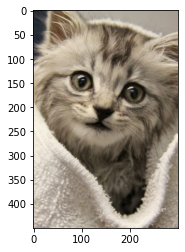

In [ ]:
path='C:/Users/Shamine/Downloads/images/19954618_571.jpg'

imag=tf.keras.preprocessing.image.load_img(path)
plt.imshow(imag)


img=tf.keras.preprocessing.image.load_img(path,target_size=(32,32))

x=tf.keras.preprocessing.image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
c=model.predict(images,batch_size=10)
p=c.argmax()

if(p==0):
    print("The below image is of Bombay cat breed")
elif(p==1):
    print("The below image is of British Shorthair cat breed")
elif(p==2):
    print("The below image is of Burmese cat breed")
elif(p==3):
    print("The below image is of Calico cat breed")
elif(p==4):
    print("The below image is of Dilute Calico cat breed")
elif(p==5):
    print("The below image is of Himalayan cat breed")
elif(p==6):
    print("The below image is of Munchkin cat breed")
elif(p==7):
    print("The below image is of Ragdoll cat breed")
elif(p==8):
    print("The below image is of Russian Blue cat breed")
else:
    print("The below image is of Siberian cat breed")

The below image is of Calico cat breed


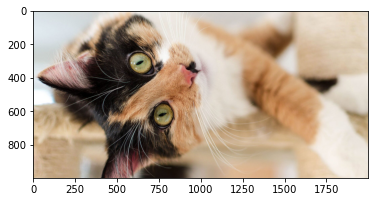

In [ ]:
path='C:/Users/Shamine/Downloads/catc.jfif'

imag=tf.keras.preprocessing.image.load_img(path)
plt.imshow(imag)


img=tf.keras.preprocessing.image.load_img(path,target_size=(32,32))

x=tf.keras.preprocessing.image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
c=model.predict(images,batch_size=10)
p=c.argmax()

if(p==0):
    print("The below image is of Bombay cat breed")
elif(p==1):
    print("The below image is of British Shorthair cat breed")
elif(p==2):
    print("The below image is of Burmese cat breed")
elif(p==3):
    print("The below image is of Calico cat breed")
elif(p==4):
    print("The below image is of Dilute Calico cat breed")
elif(p==5):
    print("The below image is of Himalayan cat breed")
elif(p==6):
    print("The below image is of Munchkin cat breed")
elif(p==7):
    print("The below image is of Ragdoll cat breed")
elif(p==8):
    print("The below image is of Russian Blue cat breed")
else:
    print("The below image is of Siberian cat breed")

### Therefore the model is able to predict t=different breeds of cats